In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gensim

In [2]:
gen_w2v = gensim.models.Word2Vec.load('models/labeled_w2v.model')

In [3]:
gen_w2v.wv.most_similar(positive=['woman_sfi'], negative=['man_sfi'])

[('Edith', 0.398983359336853),
 ('Julia', 0.3938487768173218),
 ('Mistress', 0.38925355672836304),
 ('womanhood', 0.379876971244812),
 ('hers', 0.3735180199146271),
 ('governess', 0.373481810092926),
 ('maidens', 0.3645138144493103),
 ('lovely', 0.3642154932022095),
 ('Wrackgarth', 0.36415529251098633),
 ('charms', 0.3576781749725342)]

In [4]:
df_books = pd.read_csv('params/df_libros.csv')
with open('params/terms.txt') as f:
    terms = f.read().split('\n')
terms

['he', 'she', 'his', 'her', 'man', 'woman', '']

In [5]:
terms_m = [terms[i * 2] for i in range(int(len(terms)/2))]
terms_f = [terms[i * 2 + 1] for i in range(int(len(terms)/2))]

In [6]:
labeled_terms_f = []
labeled_terms_m = []
for cat in df_books.clave.unique().tolist():
    for t in range(len(terms_f)):
        labeled_terms_f.append(terms_f[t] + '_' + cat)
        labeled_terms_m.append(terms_m[t] + '_' + cat)

In [109]:
terms_gender = pd.DataFrame({
    'fem': labeled_terms_f,
    'mas': labeled_terms_m
})
terms_gender['term'] = (
    terms_gender.fem.str.split('_').apply(lambda x: x[0]) + '_' +
    terms_gender.mas.str.split('_').apply(lambda x: x[0])
)
terms_gender['etiq'] = (
    terms_gender.mas.str.split('_').apply(lambda x: x[1])
)
terms_gender.head(5)

,fem,mas,term,etiq
0,she_adv,he_adv,she_he,adv
1,her_adv,his_adv,her_his,adv
2,woman_adv,man_adv,woman_man,adv
3,she_sfi,he_sfi,she_he,sfi
4,her_sfi,his_sfi,her_his,sfi


In [9]:
df_books.groupby('genero')['clave'].count().sort_values(ascending=False)

genero
Science Fiction       1319
Historical Fiction     356
Children's Fiction     333
Humor                  165
Detective Fiction       98
Fantasy                 97
Western                 92
Adventure               81
School Stories          62
Horror                  44
Crime Fiction           31
Gothic Fiction          25
Mystery Fiction         13
Erotic Fiction           8
Name: clave, dtype: int64

In [10]:
X = gen_w2v.wv[gen_w2v.wv.vocab]

/home/irving/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [11]:
X.shape

(136948, 300)

In [18]:
pca = PCA(n_components=2)
pca = pca.fit(X)
X_pca = pca.transform(X)

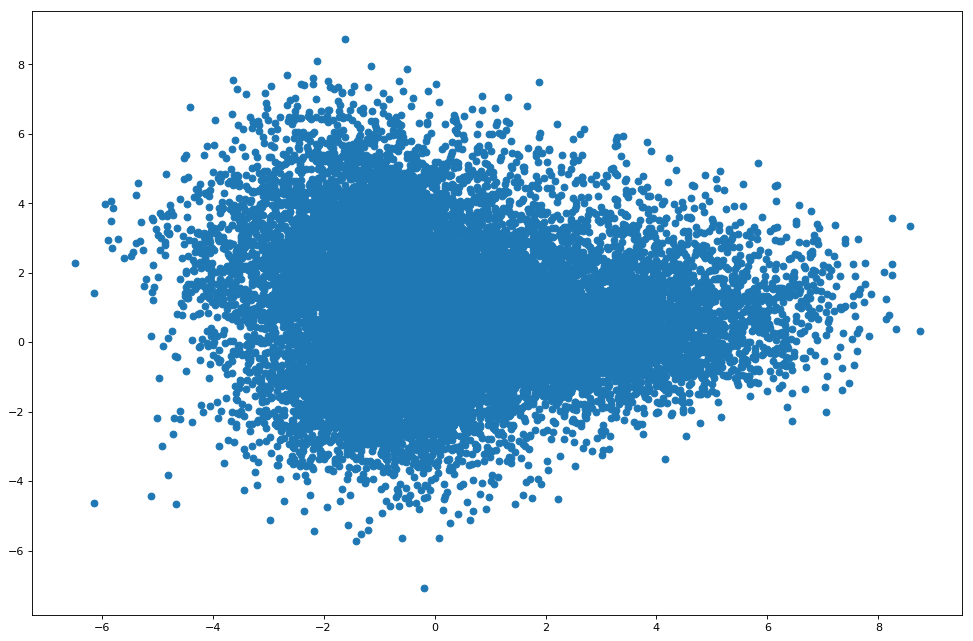

In [41]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

In [105]:
lista_f = terms_gender.fem.tolist()
lista_m = terms_gender.mas.tolist()
etiq = terms_gender.etiq.tolist()

X_f = gen_w2v.wv[lista_f]
X_m = gen_w2v.wv[lista_m]

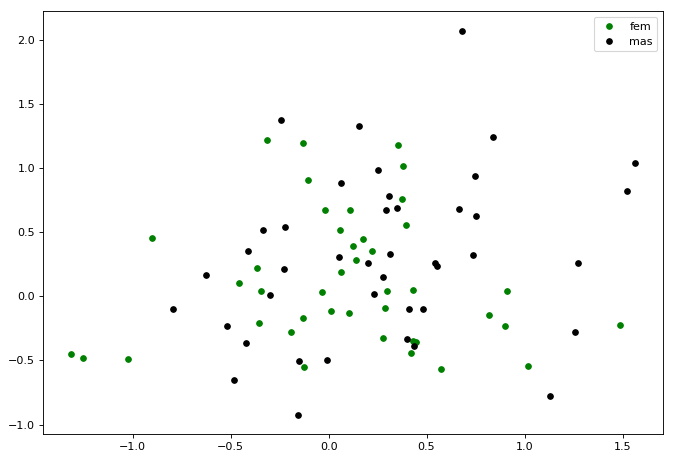

In [175]:
plt.figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(X_f[:, 0], X_f[:, 1], 'g.', markersize=10, label='fem')
plt.plot(X_m[:, 0], X_m[:, 1], 'k.', markersize=10, label='mas')
plt.legend()
plt.show()

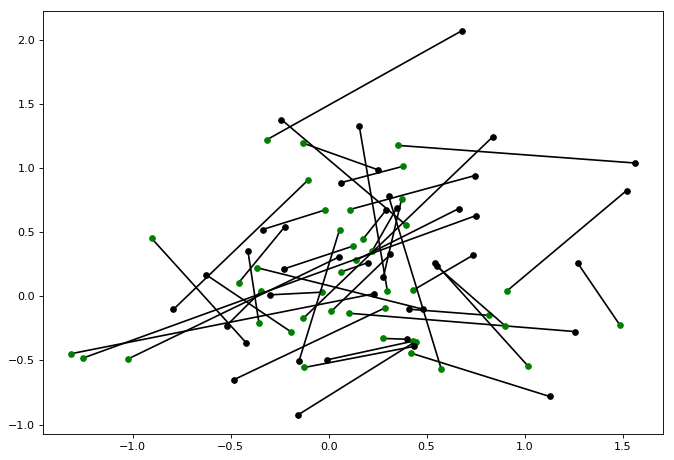

In [174]:
plt.figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
for x in range(X_f.shape[0]):
    plt.plot(np.array([X_m[x, 0],X_f[x, 0]]), np.array([X_m[x, 1],X_f[x, 1]]), 'k')
    plt.plot(X_f[x, 0], X_f[x, 1], 'g.', markersize=10)
    plt.plot(X_m[x, 0], X_m[x, 1], 'k.', markersize=10)
plt.show()

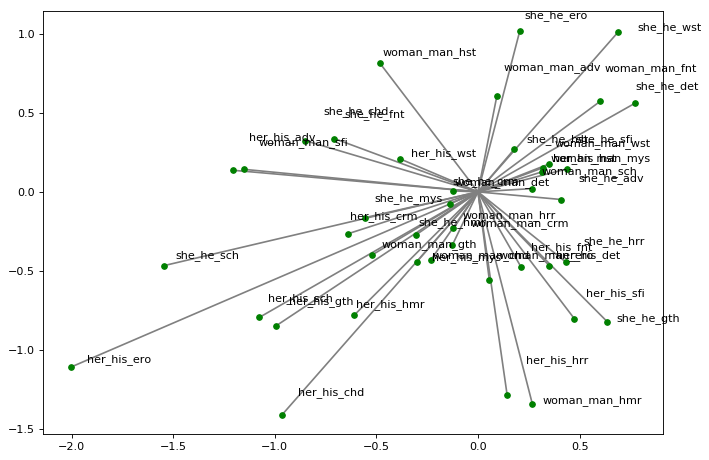

In [106]:
plt.figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
for x in range(X_f.shape[0]):
    plt.plot(np.array([0, X_f[x, 0] - X_m[x, 0]]), np.array([0, X_f[x, 1] - X_m[x, 1]]), 'gray')
for x in range(X_f.shape[0]):
    plt.plot(X_f[x, 0] - X_m[x, 0], X_f[x, 1] - X_m[x, 1], 'g.', markersize=10)
    plt.text((np.random.rand()/10) + (X_f[x, 0] - X_m[x, 0]),
             (np.random.rand()/5) + X_f[x, 1] - X_m[x, 1],
             etiq[x])
plt.show()

In [87]:
gen_w2v.wv.most_similar(positive=['her_ero'], negative=['his_ero'])

[('sister', 0.3341459035873413),
 ('_murder_', 0.2863979935646057),
 ('mamma', 0.28148528933525085),
 ('Gloria', 0.26904749870300293),
 ('Aunt', 0.2642596662044525),
 ('daughter', 0.26422303915023804),
 ('Mademoiselle', 0.26061031222343445),
 ('disfavor', 0.25792792439460754),
 ('wife', 0.2570696473121643),
 ('niece', 0.25475654006004333)]

In [ ]:
plt.figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
for x in range(X_f.shape[0]):
    plt.plot(np.array([0, X_f[x, 0] - X_m[x, 0]]), np.array([0, X_f[x, 1] - X_m[x, 1]]), 'gray')
for x in range(X_f.shape[0]):
    plt.plot(X_f[x, 0] - X_m[x, 0], X_f[x, 1] - X_m[x, 1], 'g.', markersize=10)
    plt.text((np.random.rand()/10) + (X_f[x, 0] - X_m[x, 0]),
             (np.random.rand()/5) + X_f[x, 1] - X_m[x, 1], lista_f[x])
plt.show()

In [113]:
def grafica_termino(termino):
    indice = (terms_gender.term == termino)
    lista_f = terms_gender[indice].fem.tolist()
    lista_m = terms_gender[indice].mas.tolist()
    etiq = terms_gender[indice].etiq.tolist()

    X_f = gen_w2v.wv[lista_f]
    X_m = gen_w2v.wv[lista_m]
    
    plt.figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
    for x in range(X_f.shape[0]):
        plt.plot(np.array([0, X_f[x, 0] - X_m[x, 0]]), np.array([0, X_f[x, 1] - X_m[x, 1]]), 'gray')
    for x in range(X_f.shape[0]):
        plt.plot(X_f[x, 0] - X_m[x, 0], X_f[x, 1] - X_m[x, 1], 'g.', markersize=10)
        plt.text((np.random.rand()/20) + (X_f[x, 0] - X_m[x, 0]),
                 (np.random.rand()/20) + X_f[x, 1] - X_m[x, 1],
                 etiq[x])
    plt.title(termino)
    plt.show()

In [130]:
def most_sim(lab, gen):
    labs = lab.split('_')
    return gen_w2v.wv.most_similar(positive=[labs[0] + '_' + gen],
                                   negative=[labs[1] + '_' + gen])

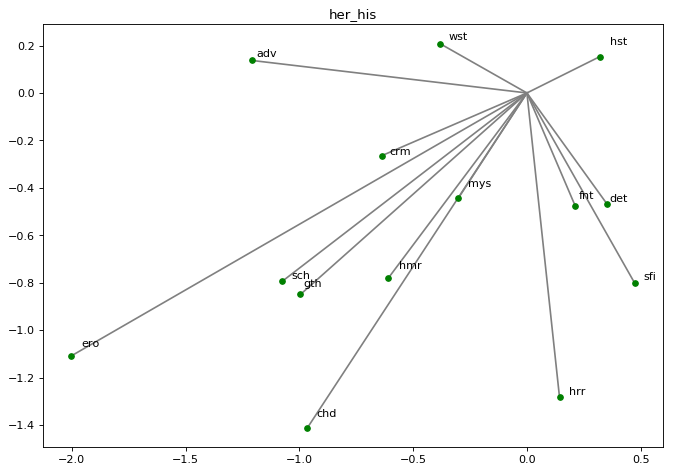

In [131]:
grafica_termino('her_his')

In [132]:
most_sim('her_his', 'ero')

[('sister', 0.3341459035873413),
 ('_murder_', 0.2863979935646057),
 ('mamma', 0.28148528933525085),
 ('Gloria', 0.26904749870300293),
 ('Aunt', 0.2642596662044525),
 ('daughter', 0.26422303915023804),
 ('Mademoiselle', 0.26061031222343445),
 ('disfavor', 0.25792792439460754),
 ('wife', 0.2570696473121643),
 ('niece', 0.25475654006004333)]

In [133]:
most_sim('her_his', 'adv')

[('Hebe', 0.3577912747859955),
 ('loveliness', 0.33381855487823486),
 ('mistress', 0.3332536816596985),
 ('veil', 0.3305426239967346),
 ('goddess', 0.3299770653247833),
 ('blushes', 0.32889050245285034),
 ('herself', 0.3274869918823242),
 ('beauty', 0.32112619280815125),
 ('nymph', 0.3192458748817444),
 ('charms', 0.319074809551239)]

In [136]:
most_sim('her_his', 'hrr')

[('Ann', 0.31307253241539),
 ('sisters', 0.31017225980758667),
 ('lovers', 0.30902746319770813),
 ('Hebe', 0.3056294322013855),
 ('husbands', 0.304935097694397),
 ('Dorothy', 0.30355650186538696),
 ('Maria', 0.3016200363636017),
 ('maidens', 0.29723867774009705),
 ('Bess', 0.2948507070541382),
 ('Helen', 0.29199302196502686)]

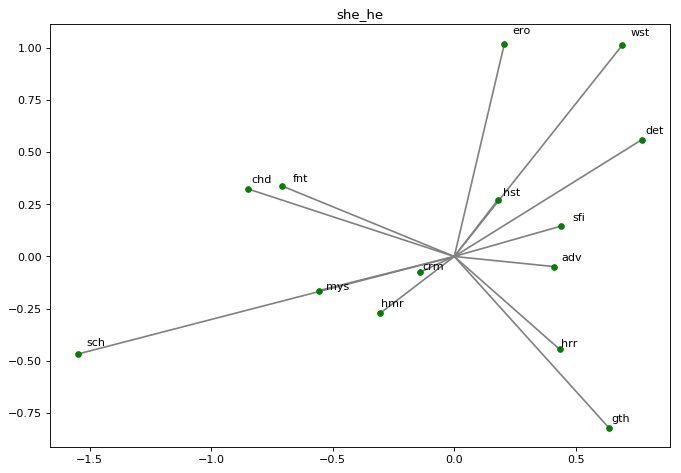

In [115]:
grafica_termino('she_he')

In [137]:
most_sim('she_he', 'sch')

[('Aunt', 0.3515401780605316),
 ('Mary', 0.3421455919742584),
 ('governess', 0.32373687624931335),
 ('Annie', 0.30129754543304443),
 ('Helen', 0.30091938376426697),
 ('marriage', 0.29393044114112854),
 ('Edith', 0.293290376663208),
 ('Ida', 0.2882923185825348),
 ('Queen', 0.2865932583808899),
 ('Martha', 0.28279027342796326)]

In [140]:
most_sim('she_he', 'chd')

[('governess', 0.3692054748535156),
 ('nurse', 0.36450502276420593),
 ('Sister', 0.36151373386383057),
 ('Aunt', 0.3614264726638794),
 ('godmother', 0.34583213925361633),
 ('Wrackgarth', 0.32830917835235596),
 ('Edith', 0.3242574632167816),
 ('Martha', 0.31927239894866943),
 ('sweetest', 0.31829026341438293),
 ('Dowager', 0.31744226813316345)]

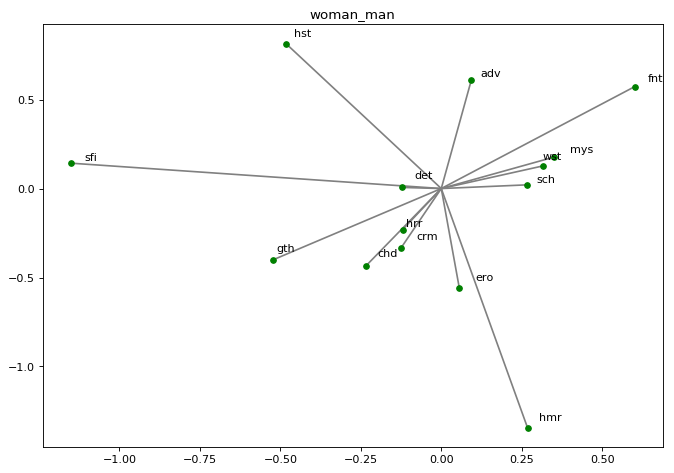

In [125]:
grafica_termino('woman_man')

In [144]:
most_sim('woman_man', 'sfi')

[('Edith', 0.398983359336853),
 ('Julia', 0.3938487768173218),
 ('Mistress', 0.38925355672836304),
 ('womanhood', 0.379876971244812),
 ('hers', 0.3735180199146271),
 ('governess', 0.373481810092926),
 ('maidens', 0.3645138144493103),
 ('lovely', 0.3642154932022095),
 ('Wrackgarth', 0.36415529251098633),
 ('charms', 0.3576781749725342)]

In [145]:
most_sim('woman_man', 'hmr')

[('sex', 0.3297797441482544),
 ('weeps', 0.3135947287082672),
 ('fickle', 0.3073592782020569),
 ('faithless', 0.30566370487213135),
 ('empress', 0.30552154779434204),
 ('actress', 0.30339309573173523),
 ('Crosby', 0.302127480506897),
 ('woman', 0.30086585879325867),
 ('womanhood', 0.29930558800697327),
 ('adored', 0.2965346872806549)]

In [146]:
most_sim('woman_man', 'hst')

[('Louise', 0.3475628197193146),
 ('Irene', 0.3310852646827698),
 ('Catherine', 0.3309902250766754),
 ('Mandane', 0.3282238245010376),
 ('Maria', 0.32795751094818115),
 ('Madame', 0.3271868824958801),
 ('Lucia', 0.3230259120464325),
 ('her_det', 0.31136104464530945),
 ('Matilda', 0.30910053849220276),
 ('Rachel', 0.30528753995895386)]

In [120]:
df_books[['genero', 'clave']].drop_duplicates().sort_values(by='genero')

,genero,clave
0,Adventure,adv
59,Children's Fiction,chd
45,Crime Fiction,crm
28,Detective Fiction,det
363,Erotic Fiction,ero
6,Fantasy,fnt
4,Gothic Fiction,gth
10,Historical Fiction,hst
3,Horror,hrr
62,Humor,hmr


In [124]:
terms_gender[['term',]].drop_duplicates()

,term
0,she_he
1,her_his
2,woman_man


In [169]:
gen_w2v.wv.most_similar(positive=['lost', 'hit'], negative=['found'])

[('missed', 0.4359595477581024),
 ('hurt', 0.43477314710617065),
 ('lose', 0.4267306923866272),
 ('losing', 0.397326797246933),
 ('scored', 0.3790367841720581),
 ('hitting', 0.37539374828338623),
 ('smashed', 0.3704816699028015),
 ('fired', 0.3659232258796692),
 ('sprained', 0.36254769563674927),
 ('miss', 0.3617610037326813)]